#Импорты

#Вырезание боксов

In [1]:
import easyocr
import cv2
import matplotlib.pyplot as plt

In [2]:
# Создаем экземпляр распознавателя
reader = easyocr.Reader(['ru'])  # Поддержка русского языка

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [3]:
# Загружаем изображение
image_path = 'data/t1_dataset/1_pass_1.png'  # Замените на путь к вашему изображению
image = cv2.imread(image_path)

In [4]:
# Выполняем распознавание текста
results = reader.readtext(image)

# Список для хранения изображений распознанного текста
recognized_text_images = []

# Обрабатываем результаты
for (bbox, text, prob) in results:
    (top_left, top_right, bottom_right, bottom_left) = bbox
    top_left = tuple(map(int, top_left))
    bottom_right = tuple(map(int, bottom_right))

    # Вырезаем изображение с распознанным текстом
    cropped_image = image[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]

    # Добавляем вырезанное изображение в массив
    recognized_text_images.append(cropped_image)

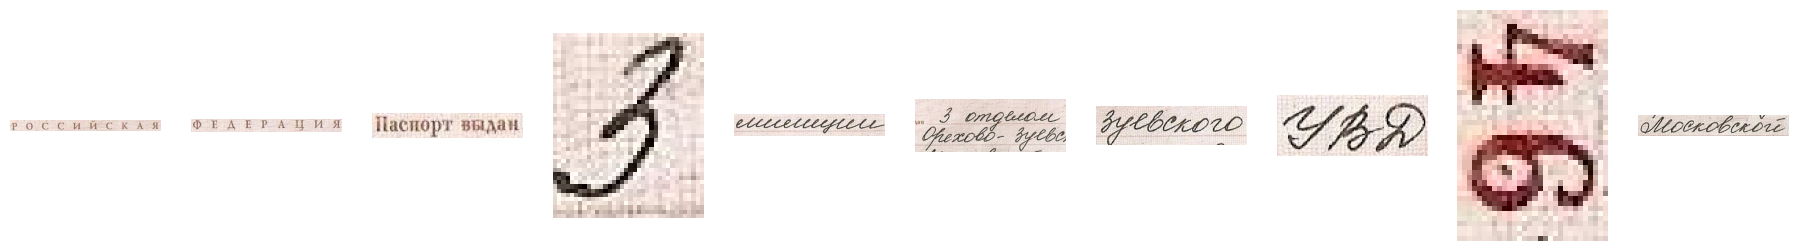

In [5]:
  # Отображаем все вырезанные изображения
if recognized_text_images:  # Проверяем, есть ли изображения для отображения
      plt.figure(figsize=(100, 50))  # Устанавливаем размер фигуры
      for idx, cropped_image in enumerate(recognized_text_images):
          if cropped_image.size > 0 and idx < 10:  # Проверяем, не пустое ли изображение
              plt.subplot(1, len(recognized_text_images), idx + 1)
              plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
              plt.axis('off')
      plt.show()
else:
      print("No valid cropped images to display.")

In [6]:
# Выводим распознанный текст
for (bbox, text, prob) in results:
    print(f'Text: {text}')

Text: ₽ 0 С € и Й С КА Я
Text: Ф Е д4 Е Р А Ц И Я
Text: Паспорт #ыдан
Text: 3
Text: е €е_с&
Text: "912х063' %е6
Text: 'у%болоъо
Text: У, 9
Text: 6
Text: 0СоСтобоюоъ€
Text: @>_2-@/ъ&&
Text: 03. 03. %2;
Text: 6 03 - 074
Text: 2
Text: Дата ппдачи
Text: Жод подразАеления
Text: Аичный код
Text: 5
Text: $
Text: '  
Text: Аичная подтисъ
Text: Фалия
Text: (. &сее6
Text: Нмя
Text: 66ъс&
Text: 65
Text: Отчество
Text: (&?  . объ
Text: Дата
Text: % 05  79'*6
Text: 2
Text: Пол
Text: ч7%
Text: рождения
Text: ресдения
Text: 2
Text: О/сетобо- Зео
Text: 0/досообоклот&
Text: (2ст:
Text: 5
Text: ##1
Text: ?7 4
Text: 533


# Классификация  текста

https://colab.research.google.com/drive/1MPRp7oWjvt4NEGWA1_N09E11YPEUgnPK?usp=sharing

In [9]:
import tensorflow as tf

In [7]:
!pip list

In [10]:
import tensorflow as tf
import numpy as np

In [12]:
model = tf.keras.models.load_model('models/my_model.keras')

C:\Users\mrtsstlrs\AppData\Local\pypoetry\Cache\virtualenvs\documentrecognitiont1-g6_1Yft3-py3.12\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 22 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [13]:
preprocessed_images = []
for cropped_image in recognized_text_images:
    # Проверяем, что обрезанное изображение не пустое
    if cropped_image.size > 0:
        # Преобразуем обрезанное изображение в формат float32 и нормализуем
        cropped_image = cropped_image.astype('float32') / 255.0  # Нормализация

        # Преобразуем обрезанное изображение в тензор
        img_tensor = tf.convert_to_tensor(cropped_image)

        # Если модель ожидает входные данные в формате (batch_size, height, width, channels)
        img_tensor = tf.expand_dims(img_tensor, axis=0)  # Добавляем размерность для батча

        # Добавляем предобработанное изображение в список
        preprocessed_images.append(img_tensor)

In [14]:
handwritten_text = []
for img in preprocessed_images:
    predictions = model.predict(img)
    # Проверяем условие для вывода "handwritten" или "printed"
    if predictions[0][0] > 0.5:  # Проверяем первое значение предсказания
        print("printed")
    else:
        handwritten_text.append(img)
        print("handwritten")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
printed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
printed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
printed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
handwritten
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
handwritten
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
handwritten
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
handwritten
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
handwritten
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
handwritten
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
handwritten
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
handwritten
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
handwritten
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
handwritten
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
handwritten
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
printed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
printed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
printed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
printed
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
handwritten
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
handwritten
1/1 ━━━━━━